<a href="https://colab.research.google.com/github/sultanmr/cifar-resnet/blob/main/train_cifar10_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

1. Import Libraries

# 1. Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, BatchNormalization, Flatten, Activation, Dropout
from tensorflow.keras.optimizers import Adam


# 2. Load and Limit the Dataset

In [3]:
#as per requirements from sprint
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

n = 10000
train_images = train_images[:n]
train_labels = train_labels[:n]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# 3. Preprocess the Data

In [4]:
#converting to gray scale
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

#converting to one hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


# 4. Set Up the ResNet50 Base Model

In [5]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base model
#include_top is set to false because we don't want to include the top layer of the model

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 5. Build the Custom Head

In [6]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),

    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

'''
model = Sequential()
model.add(base_model)
#global average pooling is used to reduce the dimensionality of the output of the base model
model.add(GlobalAveragePooling2D())
model.add(Dense(512))
model.add(Dropout(.5))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Dropout(.5))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Dropout(.5))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Dropout(.5))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(32))
model.add(Dropout(.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
'''
'''
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(.3))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(.3))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(.3))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(.3))

#output layer with 10 nodes is used because we have 10 classes
#softmax activation function is used because we want to predict the class with the highest probability
model.add(Dense(10, activation='softmax'))
'''

"\nmodel.add(Dense(256))\nmodel.add(BatchNormalization())\nmodel.add(Activation('relu'))\nmodel.add(Dropout(.3))\nmodel.add(Dense(128))\nmodel.add(BatchNormalization())\nmodel.add(Activation('relu'))\nmodel.add(Dropout(.3))\nmodel.add(Dense(64))\nmodel.add(BatchNormalization())\nmodel.add(Activation('relu'))\nmodel.add(Dropout(.3))\nmodel.add(Dense(32))\nmodel.add(BatchNormalization())\nmodel.add(Activation('relu'))\nmodel.add(Dropout(.3))\n\n#output layer with 10 nodes is used because we have 10 classes\n#softmax activation function is used because we want to predict the class with the highest probability\nmodel.add(Dense(10, activation='softmax'))\n"

# 6. Compile the Model

In [7]:
#categorical_crossentropy is being used because we do have multiple classes in one hot encoding and we want to predict the class with the highest probability
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#  7. Train the Head

In [8]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 179ms/step - accuracy: 0.1715 - loss: 2.4050 - val_accuracy: 0.1075 - val_loss: 2.5265
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.2870 - loss: 1.9909 - val_accuracy: 0.1810 - val_loss: 2.5451
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 166ms/step - accuracy: 0.3097 - loss: 1.9077 - val_accuracy: 0.2290 - val_loss: 2.2757
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 166ms/step - accuracy: 0.3558 - loss: 1.8136 - val_accuracy: 0.2040 - val_loss: 2.4153
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 78s 152ms/step - accuracy: 0.3686 - loss: 1.7664 - val_accuracy: 0.1835 - val_loss: 3.8056
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 166ms/step - accuracy: 0.3763 - loss: 1.7438 - val_accuracy: 0.1710 - val_loss: 2.6574
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.3885 - loss: 1.6961 - val_accuracy: 0.1825 - val_loss: 2.4695
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 164ms/step - accuracy: 0.4055 - loss: 1

# 8. Unfreeze and Train the Whole Model

In [9]:
base_model.trainable = True
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 491s 4s/step - accuracy: 0.1577 - loss: 2.6678 - val_accuracy: 0.1030 - val_loss: 10.1629
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 496s 4s/step - accuracy: 0.2298 - loss: 2.1706 - val_accuracy: 0.1045 - val_loss: 63.6593
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 447s 4s/step - accuracy: 0.2671 - loss: 1.9716 - val_accuracy: 0.1045 - val_loss: 139.9206
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 501s 4s/step - accuracy: 0.3361 - loss: 1.7997 - val_accuracy: 0.1110 - val_loss: 55.9756
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 501s 4s/step - accuracy: 0.3743 - loss: 1.6956 - val_accuracy: 0.1060 - val_loss: 8.4572
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 502s 4s/step - accuracy: 0.4261 - loss: 1.6003 - val_accuracy: 0.1240 - val_loss: 3.1562
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 499s 4s/step - accuracy: 0.4497 - loss: 1.5237 - val_accuracy: 0.2305 - val_loss: 2.2293
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 445s 4s/step - accuracy: 0.4954 - loss: 1.4559 - val

# 9. Evaluate the Model

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy:{test_acc*100:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.4528 - loss: 1.5443
Test accuracy:44.99


# Ctrl + S

In [11]:
#View Results: https://dagshub.com/sultanmr/my-first-repo.mlflow/#/experiments/2/runs/bfc550c5403b44c0a980c0629be2de58/artifacts
#saved to load on dagshub using mlflow code is in mlflow-dagshub.py
#saved to load on streamlit based ui code is in app.py
model.save('resnet50_model.h5')

full_history = {
    'accuracy': history_fine.history['accuracy'] ,
    'val_accuracy': history_fine.history['val_accuracy'],
    'loss': history_fine.history['loss'],
    'val_loss': history_fine.history['val_loss']
}
#save test data for viz of train loss and accuracy on dagshub, code is in mlflow-dagshub.py
np.savez('history.npz', **full_history)

#saved to load on dagshub using mlflow code is in mlflow-dagshub.py with confusion matrix
np.savez('test_data.npz', images=test_images, labels=test_labels)

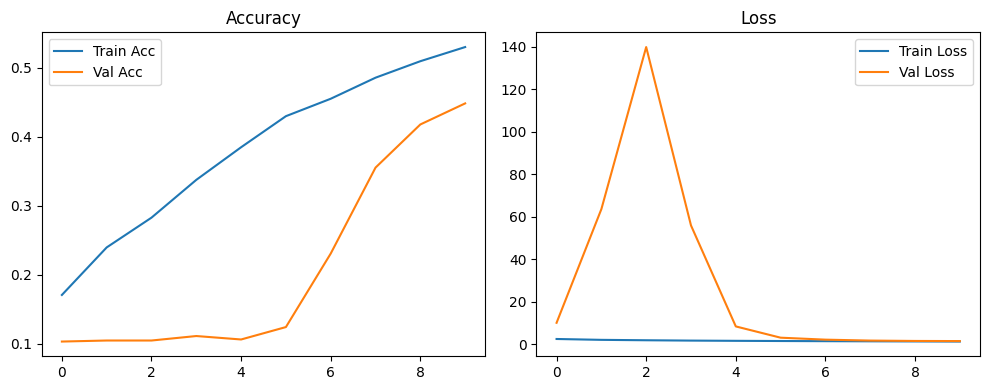

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(full_history['accuracy'], label='Train Acc')
plt.plot(full_history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

    # Loss
plt.subplot(1, 2, 2)
plt.plot(full_history['loss'], label='Train Loss')
plt.plot(full_history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()
